<a href="https://colab.research.google.com/github/moonryul/course-v3/blob/master/Copy_of_Copy_of_Copy_of_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%matplotlib inline 
##inline versus notebook: https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1

from fastai.basics import *
# The above imports import matplotlib.pyplot as plt, for example.

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points. So far, we studied a classfication problem where the neural net is a function that predicts a class/category for each input data item. In a regression problem, the neural net is a function that predicts values that correspond to input items, not categories/classes. Here we study a regression problem, because it is easier to use to explain the basic ideas of machine learning, such as loss functions, gradients of the loss functions. 

In [5]:
n=100

In [7]:
## create a 2D vector of parameters (weights) 
a = tensor(3.,2); a

tensor([3., 2.])

In [ ]:
a[0]; 

tensor(2.)

In [8]:
y = x@a + torch.rand(n) 
# x@a: @ is matrix multiplication in Python3:
#https://stackoverflow.com/questions/27385633/what-is-the-symbol @ in-python
# https://www.kaggle.com/ostaski/1-fastai-computational-linear-algebra


In [ ]:
y

tensor([-0.5508, -0.1523,  2.3636,  0.2653,  5.6253,  4.0330,  2.2624,  2.0791,
         4.8466, -0.5162,  4.4148, -0.3844,  2.9462,  2.1970,  1.1926,  4.0901,
         1.1490,  2.6077,  5.1565,  0.4769,  3.0729,  3.9988,  0.8402,  4.9328,
         5.2606,  5.2203,  5.4442,  3.9573,  0.7692,  4.4445,  0.5254,  2.0011,
         1.2070,  1.5212,  4.6879,  1.9249,  3.3960,  2.7046,  5.1754,  1.2380,
         3.3325, -0.0234,  1.1106,  3.5178,  0.7034,  4.6815,  4.5191,  2.0265,
         5.0861,  5.1638,  1.6140,  0.6530,  2.1956,  2.8595,  0.6832,  5.2319,
         4.5527,  1.4261,  3.2052,  0.2051,  2.3400,  5.2580,  2.5997, -0.2910,
         0.4437,  3.0997,  4.2346,  2.3964,  1.6405,  0.5185,  0.3224,  0.9014,
         5.3576,  3.1015,  1.3168,  2.4504,  3.7788,  4.1606, -0.1891,  1.1392,
         0.1981,  3.4606,  4.1281,  2.9449,  4.9080,  1.7352,  5.5634,  2.1949,
         2.5854,  2.6913, -0.3346,  4.5072,  2.0398,  4.8715,  1.6220,  0.2656,
        -0.6429,  2.8040,  1.6606,  0.19

In [9]:
plt.rcParams['figure.figsize'] = [10,10]

In [ ]:
x[:,1]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
ax.scatter3D??


Object `ax.scatter3D` not found.


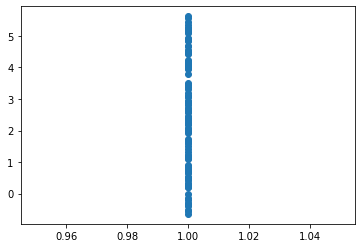

In [ ]:
plt.scatter(x[:,1], y); # plt = matplotlib.pyplot

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [14]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose [guess] we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [ ]:
tensor(1.,2.).mean()

tensor(1.5000)

In [ ]:
tensor??
as_tensor([1,2])

tensor([1, 2])

In [ ]:
(1,) +(2,)

(1, 2)

In [ ]:
is_listy( (1,2) )

True

In [ ]:
is_listy( [1,2])

True

In [ ]:
#https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb

In [ ]:
a = tensor(-1.,1)

In [15]:
y_hat = x@a
mse(y_hat, y)

tensor(0.3086)

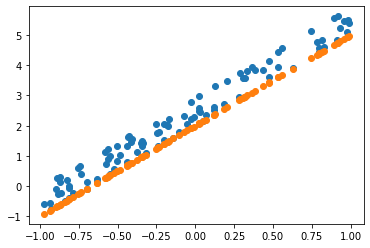

In [25]:
plt.scatter(x[:,0],y)
#with torch.no_grad():
plt.scatter(x[:,0],y_hat);
## https://effbot.org/zone/python-with-statement.htm
## https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch

##gradients## Torch.no_grad() deactivates autograd engine.
## The wrapper "with torch.no_grad()" temporarily set ALL the requires_grad flag to false.
## Disabling gradient calculation is useful for inference,
## when you are sure that you will not call Tensor.backward(). It will reduce memory consumption 
## for computations that would otherwise have requires_grad=True. 
#x = torch.randn(3, requires_grad=True)
#print(x.requires_grad)
#print((x ** 2).requires_grad)

#with torch.no_grad():
#    print((x ** 2).requires_grad)
#Out:

#True
#True
#False
##Use of Torch.no_grad():
##To perform inference without Gradient Calculation.
##used to perform Validation.

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [20]:
a = nn.Parameter(a); a

Parameter containing:
tensor([3., 2.], requires_grad=True)

In [21]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() 
    with torch.no_grad():
      a.sub_(lr * a.grad)
      a.grad.zero_()

# Error Message: leaf variable was used in an inplace
## https://discuss.pytorch.org/t/leaf-variable-was-used-in-an-inplace-operation/308Loosely, 
##tensors you create directly are leaf variables.
# Tensors that are the result of a differentiable operation are not leaf variables

#For example:
#
#w = torch.tensor([1.0, 2.0, 3.0]) # leaf variable
#x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True) # also leaf variable
#y = x + 1  # not a leaf variable

#An in-place operation is something which modifies the data of a variable. For example:

#x += 1  # in-place
#y = x + 1 # not in place
#PyTorch doesn’t allow in-place operations on leaf variables that have requires_grad=True (such as parameters of your model) because the developers could not decide how such an operation should behave. If you want the operation to be differentiable, you can work around the limitation by cloning the leaf variable (or use a non-inplace version of the operator).

#x2 = x.clone()  # clone the variable
#x2 += 1  # in-place operation
#If you don’t intend for the operation to be differentiable, you can use torch.no_grad:

#with torch.no_grad():
#    x += 1

 #https://discuss.pytorch.org/t/gradient-argument-in-out-backward-gradient/12742
   # https://discuss.pytorch.org/t/what-does-tensor-backward-do-mathematically/27953/3
   #If y is of size N, then y.backward(gradient) will use the chain rule to compute the gradient for every parameter in the network. For a give param, w of size d,
   # it will perform: gradient * dy/dw where dy/dw will will be computed by the chain rule.

##If loss is a tensor with a single element, loss.backward() is the same 
##as loss.backward(torch.Tensor([1])) and thus will compute for every parameter w: 
##1 * dloss / dw = dloss / dw. And so the .grad attribute of each w
## will just contain this gradient.
##https://medium.com/@zhang_yang/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

   #Each time you run .backward() the stored gradients for each parameter are updated 
   #by adding the new gradients. This allows us to cumulate gradients 
   #over several samples or several batches before using the gradients to update the weights.
   # Once you have updated the weights you don’t want to keep those gradients around 
   # because if you reuse them, then you will push the weights too far.
##https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
# torch.Tensor, say a above, is the central class of the package.
# If you set its attribute .requires_grad as True, it starts to track all operations on it.
#  When you finish your computation you can call .backward() 
#  and have all the gradients computed automatically. 
# The gradient for this tensor will be accumulated into .grad attribute
#To stop a tensor from tracking history, you can call .detach() to detach it
# from the computation history, and to prevent future computation from being tracked.

#To prevent tracking history (and using memory), you can also wrap the code block 
#in with torch.no_grad():. This can be particularly helpful when evaluating a model
# because the model may have trainable parameters with requires_grad=True, 
#but for which we don’t need the gradients.

In [ ]:
torch.tensor(1.)

tensor(1.)

In [22]:
lr = 1e-1
for t in range(100): update()

tensor(0.3086, grad_fn=<MeanBackward0>)
tensor(0.0912, grad_fn=<MeanBackward0>)
tensor(0.0884, grad_fn=<MeanBackward0>)
tensor(0.0883, grad_fn=<MeanBackward0>)
tensor(0.0883, grad_fn=<MeanBackward0>)
tensor(0.0882, grad_fn=<MeanBackward0>)
tensor(0.0882, grad_fn=<MeanBackward0>)
tensor(0.0882, grad_fn=<MeanBackward0>)
tensor(0.0882, grad_fn=<MeanBackward0>)
tensor(0.0882, grad_fn=<MeanBackward0>)


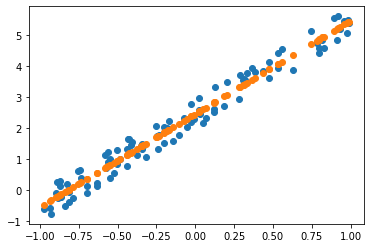

In [24]:
plt.scatter(x[:,0],y)
with torch.no_grad():
  plt.scatter(x[:,0],x@a);

## Animate it!

In [27]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [28]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
  line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
      line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.